# Problem 2

In [36]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

In [37]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

In [38]:
# learning rate
L = np.max(np.linalg.eig(2*A)[0])
lr = 1/L

In [39]:
# 参考：https://colab.research.google.com/drive/1cqbDTKIgkMElBuPlpjhvXWQpn2RfsvV1#scrollTo=C1MODsFayjMD
def st_ops(v, q):
  x = np.zeros(v.shape)
  for i in range(len(v)):
    if v[i] > q:
      x[i] = v[i] - q
    else:
      if np.abs(v[i]) < q:
        x[i] = 0
      else:
        x[i] = v[i] + q; 
  return x

In [40]:
w_hat_lam = []
lams = np.arange(2, 8, 2) # lam = 2,4,6
num_iter = 50

w = np.zeros([2,1])
for lam in lams:
  ### implement PG ###
  for _ in range(num_iter):
    grad = 2 * A@(w-mu)
    v = w - lr * grad
    w = st_ops(v, lam * lr)
  w_hat = w
  w_hat_lam.append(w_hat.squeeze())
  print("lambda is", lam, "    w_hat is", w_hat.T)
  ###

lambda is 2     w_hat is [[0.81818183 1.09090904]]
lambda is 4     w_hat is [[0.63636362 0.18181823]]
lambda is 6     w_hat is [[0.33333333 0.        ]]


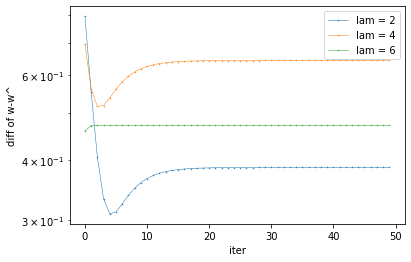

In [41]:
# result of PG
for i in range(len(lams)):
  lam = lams[i]
  norm = []
  for j in range(num_iter):
    grad = 2 * A@(w-mu)
    v = w - lr * grad
    w = st_ops(v, lam * lr)
    norm.append(np.linalg.norm(w-w_hat_lam[i]))
  plt.plot(norm, 'o-', linewidth=0.5, markersize=0.5, label='lam = '+str(lam))
plt.legend()
plt.xlabel('iter')
plt.ylabel('diff of w-w^')
plt.yscale('log')